In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [16]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    df1 = oecd_bli.loc[(oecd_bli['Indicator']=='Life satisfaction') & (oecd_bli['Inequality']=='Total'), ['Country', 'Value']]
    df2 = gdp_per_capita[['Country','2015']]
    country_stats = pd.merge(df1, df2, on='Country', how='inner')
    country_stats.rename(columns={"Value": "Life satisfaction", "2015": "GDP per capita"},  inplace=True)
    country_stats.set_index('Country', inplace=True)
    country_stats.sort_values(by="GDP per capita",  inplace=True)
    return country_stats

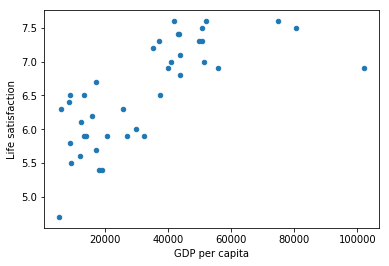

In [22]:
#Load the data
oecd_bli = pd.read_csv("BLI_21032020193554577.csv", thousands=',')
gdp_per_capita = pd.read_csv("WEO_Data.xls", thousands=',', delimiter='\t',
                            encoding='latin1', na_values="n/a")
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# plot the data
country_stats.plot(kind='scatter', x="GDP per capita",y="Life satisfaction")
plt.show()

[[6.28176479]]


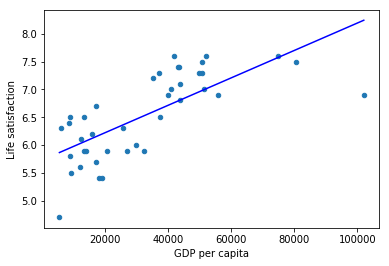

In [32]:
model = sklearn.linear_model.LinearRegression()
model.fit(x,y)
x_new = [[22587]]
print(model.predict(x_new))

#plot the learned model
t0, t1 = model.intercept_[0], model.coef_[0][0]
country_stats.plot(kind='scatter', x="GDP per capita",y="Life satisfaction")
plt.plot(x, t0 + t1*x, "b")
plt.show()